In [849]:
import os
import numpy as np
import matplotlib.pyplot as plt

root = "/scratches/cblgpu07/em626/neuralprocesses/_experiments/sawtooth/x1_y2"

In [850]:
def ema(array, w):
    
    smoothed = [array[0]]
    
    for x in array[1:]:
        smoothed.append((1 - w) * smoothed[-1] + w * x)
        
    return np.array(smoothed)
    

def read_results(model):
    
    if model in ["convcnp", "convgnp", "convnp", "fullconvgnp"]:
        model = f"{model}/unet"
        
    file = open(f"{root}/{model}/loglik/timing.txt", "r").read().strip()
    epochs, time, loglik, arloglik = list(zip(*[line.split("|") for line in file.split("\n")]))
    
    split = lambda x: float(x.split(":")[1].strip())
    
    epochs = list(map(split, epochs))
    time = list(map(split, time))
    
    split2 = lambda x: (
        float(x.split(":")[1].strip().split("+/-")[0].strip()),
        float(x.split(":")[1].strip().split("+/-")[1].strip()),
    )
    
    mean_loglik, stdderr_loglik = list(zip(*list(map(split2, loglik))))
    
    try:
        mean_arloglik, stdderr_arloglik = list(zip(*list(map(split2, arloglik))))
        
    except:
        mean_arloglik = float("nan") * np.ones_like(epochs)
        stdderr_arloglik = float("nan") * np.ones_like(epochs)
    
    mean_loglik = np.array(mean_loglik)
    stdderr_loglik = np.array(stdderr_loglik)
    mean_arloglik = np.array(mean_arloglik)
    stdderr_arloglik = np.array(stdderr_arloglik)
    
    return epochs, time, (mean_loglik, stdderr_loglik), (mean_arloglik, stdderr_arloglik)

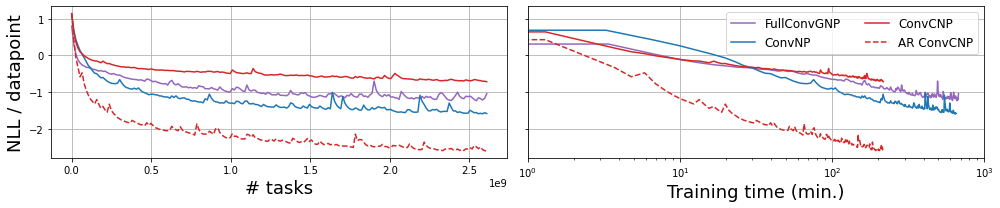

In [863]:
models = [
    ("fullconvgnp", "tab:purple", "FullConvGNP"),
    ("convnp", "tab:blue", "ConvNP"),
    ("convcnp", "tab:red", "ConvCNP"),
    # ("convgnp", "tab:green", "ConvGNP"),
]

# plt.figure(figsize=(14, 3))
plt.subplots(figsize=(14, 3), ncols=2, nrows=1, sharey=True)

w = 0.5

for model, color, name in models:
    
    epochs, time, (mean_loglik, stdderr_loglik), (mean_arloglik, stdderr_arloglik) = read_results(model)
    
    mean_loglik = ema(mean_loglik, w)
    mean_arloglik = ema(mean_arloglik, w)
    
    plt.subplot(1, 2, 1)
    plt.plot((np.array(epochs)+1)*2**12*64, -mean_loglik, color=color, label=name)
    
    if not np.any(np.isnan(mean_arloglik)):
        plt.plot((np.array(epochs)+1)*2**12*64, -mean_arloglik, "--", color=color, label="AR ConvCNP")
        
    plt.xlabel("# tasks", fontsize=18)
    plt.ylabel("NLL / datapoint", fontsize=18)
    # plt.xlim([-10, 10000])
    # plt.ylim([-3.5, 1.5])
    
    # plt.xscale("log")
    # plt.yscale("log")
    
    plt.subplot(1, 2, 2)
    plt.plot(np.array(time)/60, -mean_loglik, color=color, label=name)
    
    if not np.any(np.isnan(mean_arloglik)):
        plt.plot(np.array(time)/60, -mean_arloglik, "--", color=color, label="AR ConvCNP")
        
    plt.xlabel("Training time (min.)", fontsize=18)
    plt.xlim([1, 1000])
    # plt.ylim([-3.5, 1.5])
    # plt.xlim([0, 1600])
    # plt.xlim([0, 200])
    
    plt.xscale("log")
    # plt.yscale("log")
    
plt.subplot(1, 2, 1)
plt.grid()
    
plt.subplot(1, 2, 2)
plt.grid()

plt.legend(fontsize=12, ncol=2)
plt.tight_layout()
plt.savefig("./figs/timing.pdf")
plt.show()

In [ ]:
models = [
    ("fullconvgnp", "tab:purple", "FullConvGNP"),
    ("convnp", "tab:blue", "ConvNP"),
    ("convcnp", "tab:red", "ConvCNP"),
    # ("convgnp", "tab:green", "ConvGNP"),
]

# plt.figure(figsize=(14, 3))
plt.subplots(figsize=(14, 3), ncols=2, nrows=1, sharey=True)

w = 0.5

for model, color, name in models:
    
    epochs, time, (mean_loglik, stdderr_loglik), (mean_arloglik, stdderr_arloglik) = read_results(model)
    
    np.save(f"{model}-epochs.npy", epochs)
    np.save(f"{model}-time.npy", time)
    np.save(f"{model}-mean_loglik.npy", mean_loglik)
    np.save(f"{model}-mean_arloglik.npy", mean_arloglik)